Importing Library

In [10]:
from keras.datasets import mnist
from keras.models import  Sequential
from keras import  layers
from keras import utils
import matplotlib.pyplot as plt

Loading Dataset

In [2]:
train ,test = mnist.load_data('mnist.db')
Xtrain , Ytrain = train 
Xtest , Ytest = test

Reshaping X

In [3]:
Xtrain = Xtrain.reshape(-1 , 28*28)
Xtest = Xtest.reshape(-1 , 28*28)

Category Ecoder of Y

In [4]:
Ytrain = utils.to_categorical(Ytrain)
Ytest = utils.to_categorical(Ytest)

Creating Model 

In [5]:
model = Sequential()
model.add(layers.Input(shape=(784)))
model.add(layers.Normalization())
model.add(layers.Dense(512 , activation='relu'))
model.add(layers.Dense(256 , activation='relu'))
model.add(layers.Dense(128 , activation='relu'))
model.add(layers.Dense(64 , activation='relu'))
model.add(layers.Dense(10 , activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 784)               1569      
 on)                                                             
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                        

Compile Model

In [7]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics='accuracy')

Training

In [8]:
TrainModel = model.fit(Xtrain , Ytrain , epochs=10 , validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.8831 - accuracy: 0.8897 - val_loss: 0.2275 - val_accuracy: 0.9399
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1882 - accuracy: 0.9477 - val_loss: 0.1998 - val_accuracy: 0.9446
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1605 - accuracy: 0.9551 - val_loss: 0.1575 - val_accuracy: 0.9567
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1361 - accuracy: 0.9617 - val_loss: 0.1464 - val_accuracy: 0.9627
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1122 - accuracy: 0.9680 - val_loss: 0.1469 - val_accuracy: 0.9598
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0986 - accuracy: 0.9728 - val_loss: 0.1315 - val_accuracy: 0.9654
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0914 - accuracy: 0.9747 - val_loss: 0.1381 - val_accuracy:

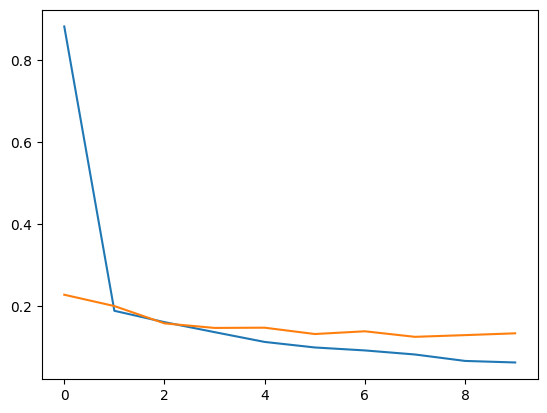

In [11]:
plt.plot(TrainModel.history["loss"])
plt.plot(TrainModel.history["val_loss"])

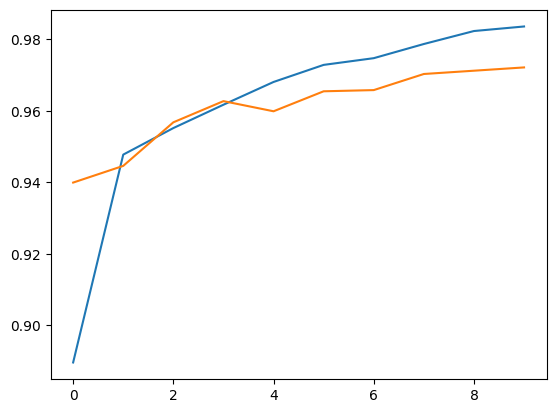

In [12]:
plt.plot(TrainModel.history["accuracy"])
plt.plot(TrainModel.history["val_accuracy"])

Evaluating

In [13]:
model.evaluate(Xtest , Ytest)

313/313 [==============================] - 1s 1ms/step - loss: 0.1170 - accuracy: 0.9756


[0.11703567206859589, 0.975600004196167]